# Express.js

É possível criar um simples servidor web para responder qualquer requisição usando apenas o pacote HTTP padrão do Node, porém outras tarefas comuns de desenvolvimento web não são suportadas diretamente pelo próprio Node. Se você deseja adicionar manipulação específica para diferentes requisições HTTP (por exemplo GET, POST, DELETE, etc.) e lidar separadamente com pedidos em diferentes caminhos de URL ("rotas"), é preciso escrever o código para isso ou utilizar um framework. Neste tutorial, trataremos do framework Express.js.

#### Segue aqui um exemplo básico para começar os testes com o Express.js: 

##### Pelo terminal, crie um diretório qualquer, por exemplo: /myapp e um arquivo de nome app.js

In [ ]:
$ mkdir myapp
$ cd myapp

##### Inicialize o projeto com o npm init
Observe que é preciso definir qual será o arquivo principal, neste caso: app.js

In [ ]:
$ npm init

##### Realize a instalação do express como dependência.

In [ ]:
$ npm install express

##### Tendo o ambiente preparado, colocaremos o seguinte código para testarmos o nosso app.js

In [ ]:
const express = require('express');
const app = express();

app.get('/', function (req, res) {
  res.send('Hello World!');
});

app.listen(3000, function () {
  console.log('Example app listening on port 3000!');
});

##### Execute o arquivo pelo terminal usando o comando node app.js
Ao abrir o navegador com o app.js rodando, podemos ver que ao acessar o endereço localhost:3000/ será recebida uma resposta do "servidor" criado, que é o texto "Hello World!"

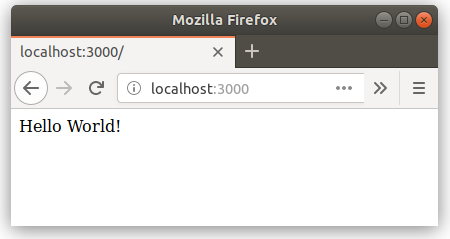

Observe que podemos criar qualquer rota que quisermos, basta definí-ĺa.

In [ ]:
const express = require('express');
const app = express();

app.get('/', function (req, res) {
  res.send('Hello World!');
});

app.get('/aplicacoes-distribuidas', (req, res) => {
    res.send('Aplicações distribuídas')
});
        
app.listen(3000, function () {
  console.log('Example app listening on port 3000!');
});

Alterando o arquivo com o código acima, e reinicializando o arquivo app.js, será possível agora acessar a nova rota criada. Isso vale para qualquer método, seja get, post, put, delete ou qualquer outro. A partir disso, com o crescimento do código, é preciso modularizar para facilitar a manutenção e desenvolvimento da aplicação.

### Criando mais um metodo na mesma rota e modularizando a aplicação

O express possui uma classe que permite criar manipuladores de rota modulares e montáveis. Uma instância de Router é um middleware e sistema de roteamento completo. Com ele é possível criar diferentes rotas, aninhá-las e até mesmo criar funções de middleware.

Aprovientando **app.js** já criado, vamos criar um novo módulo para criar outras rotas usando o Router. Crie um novo diretório chamado routes, e um novo arquivo chamado routes.js. Nele importaremos o express novamente, e criaremos uma nova instância do router.

In [ ]:
const express = require('express');
const router = express.Router();

// função middleware
router.use(function timeLog(req, res, next) {
  console.log('Time: ', Date.now());
  next();
});

router.get('/teste', function(req, res) {
  res.send('Teste');
});


module.exports = router;

A função middleware criada aqui, será executada para toda rota criada neste módulo. Ou seja, quando o endereço '/teste' receber um get, primeiro será executada a função TimeLog e depois será enviada a resposta 'Teste'.

Agora, para podermos utilizar esse novo arquivo na nossa aplicação, devemos carregar esse módulo no **app.js**. Para isso, adicione as seguintes linhas

In [ ]:
const router require('./routes/routes') 
app.use(routes)

Vale ressaltar que é possível modularizar os arquivos de rotas também, ou seja, criar outros arquivos com rotas no diretório **./routes/...** e também é possível aninhar as todas, chamando o router no código apenas uma vez. 

In [ ]:
const express = require('express');
const router = express.Router();

// função middleware
router.use(function timeLog(req, res, next) {
  console.log('Time: ', Date.now());
  next();
});

router
    .get('/teste', (req, res) => { res.send('Teste') })
    .get('/teste1', (req, res) => { res.send('Teste2') })
    .get('/teste2', (req, res) => { res.send('Teste3') })
    .get('/teste3', (req, res) => { res.send('Teste4') })

module.exports = router;

### Modularizando a aplicação com controllers

Você deve ter notado que o router no código acima está recebendo uma rota, e uma função de callback. Uma boa prática é separar para tratar essas funções de callback em um outro arquivo, usualmente em um outro diretório **./controller**. Crie uma nova pasta dentro dentro da pasta **./myapp/controller**, e dentro dele crie um novo arquivo **'controller.js'** que será depois importado nas nossas rotas. No controller colocaremos apenas uma função para testar, que se segue no código abaixo:

In [ ]:
exports.imprimir = (req, res) => {
  res.send('Tratando a requisição pelo controller!')
}

Agora no arquivo **routes.js** temos que importar a função exportada e passá-la como argumento. Agora o **routes.js** ficará assim:

In [ ]:
const express = require('express');
const router = express.Router();

const controller = require('../controller/controller')

// função middleware
router.use(function timeLog(req, res, next) {
  console.log('Time: ', Date.now());
  next();
});

router
    .get('/teste', controller.imprimir)
    .get('/teste2', (req, res) => { res.send('Teste2') })
    .get('/teste3', (req, res) => { res.send('Teste3') })
    .get('/teste4', (req, res) => { res.send('Teste4') })

module.exports = router;

Segue uma imagem de como ficou a estrutura até o momento.

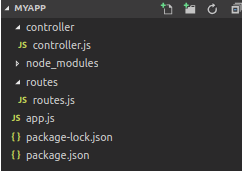

### Imprimindo dados de uma requisição

O objetivo agora é imprimir algo enviado, simulando uma requisição. Para isso, primeiramente devemos importar o body-parser, que vai permitir capturar os dados enviados no corpo de uma requisição. Essa importação será feita no nosso app.js, que se encontra na raíz do projeto. Vale lembrar que a importação deve ser feita nas primeiras linhas do código, se o uso das rotas for chamado antes do uso do body-parser, o ultimo não funcionará.

In [ ]:
var express = require('express');
var app = express();
var bodyParser = require('body-parser');
var routes = require('./routes/routes');

app.use(bodyParser.json());
app.use(routes);

app.get('/', function (req, res) {
  res.send('Hello World!');
});

app.get('/aplicacoes-distribuidas', (req, res) => {
    res.send('Aplicações distribuídas')
});
        
app.listen(3000, function () {
  console.log('Example app listening on port 3000!');
});

Agora para testarmos se a aplicação está apta a receber dados, vamos criar uma rota para receber uma requisição do tipo POST, no arquivo de rotas (lembrando que podemos ter diferentes metodos em uma mesma rota). 

In [ ]:
const express = require('express');
const router = express.Router();

const controller = require('../controller/controller')

// função middleware
router.use(function timeLog(req, res, next) {
  console.log('Time: ', Date.now());
  next();
});

router
    .get('/teste', controller.imprimir)
    .post('/teste', controller.imprimirData)
    .get('/teste2', (req, res) => { res.send('Teste2') })
    .get('/teste3', (req, res) => { res.send('Teste3') })
    .get('/teste4', (req, res) => { res.send('Teste4') })

module.exports = router;

Agora que a rota foi criada, vamos criar também a função chamada pela rota, que foi definida como "imprimirData", e isso será feito no arquivo controller.js, que agora terá a função.

In [ ]:
exports.imprimir = (req, res) => {
  res.send('Tratando a requisição pelo controller!')
}

exports.imprimirData = (req, res) => {
  let data = req.body;
  console.log(data)

  res.sendStatus(200).end('Boa!')
}

Para testar a rota é preciso fazer uma requisição do tipo POST na aplicação, para isso existem alguns softwares que facilitam e permitem enviar uma requisição de diversos tipos de requisição, com dados no corpo, cabeçalho, etc. Aqui, pode ser utilizado o de sua preferência, seja o Postman, o Insomnia ou qualquer outro (vale lembrar que a requisição deverá ser feita enviando informações no formato de json no body).

## Exercícios

1. Crie mais dois métodos (PUT e DELETE) na mesma rota "/teste", e imprima no console para mostrar as rotas funcionando.


2. Da mesma forma que a parte de controller foi modularizado, crie uma pasta "service" e um arquivo service.js para tratar os dados por lá. A importação deve ser feita da mesma forma que foi implementada a modularização do controller. Crie uma função no service para imprimir qualquer dado enviado pelo corpo de uma requisição para cada um dos métodos na rota "/teste": GET, PUT, POST e DELETE.